<a href="https://colab.research.google.com/github/useyh/class2021Fall/blob/main/nlp1201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization

In [5]:
import nltk

In [ ]:
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [ ]:
text.split()

In [ ]:
' '.join(text.split())

In [7]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
words = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)

### Normalization  
Stemming: am → am, the going → the go, having → hav  
Lemmatization: am → be, the going → the going, having → have

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

### Stopword

In [ ]:
from nltk.corpus import stopwords  
nltk.download('stopwords')
print(words)
words = [w for w in words if not w in stopwords.words('english')]
print(words)

### Collocation, Concordance

In [9]:
nltk.download('gutenberg')
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = retokenize.tokenize(text)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [ ]:
nltk.Text(words).collocations()

In [ ]:
nltk.Text(words).concordance('Emma', 79, 10)

Displaying 10 of 865 matches:
                                     Emma by Jane Austen 1816 VOLUME I CHAPTER
                                     Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this


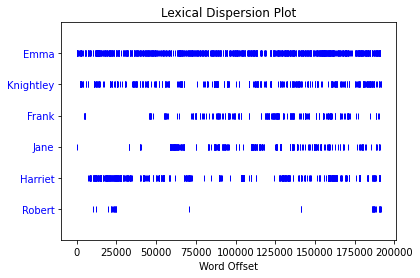

In [ ]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"]) #등장인물 나오는 빈도수, 위치

In [ ]:
nltk.Text(words).similar("Emma") #emma와 비슷하게 쓰이는 단어

she it he i weston her you harriet elton him me knightley jane that
and the all there they them


In [ ]:
nltk.Text(words).common_contexts(["Emma", "she"]) #emma, she와 비슷한 context에서 나오는 것 / _ 에 emma나 she가 같이 나옴

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


### Frequency distribution, Frequency plot

In [ ]:
fd = nltk.FreqDist(words).most_common(20) #상위 20번째 빈도로 나오는 단어와 개수
fd

[('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301)]

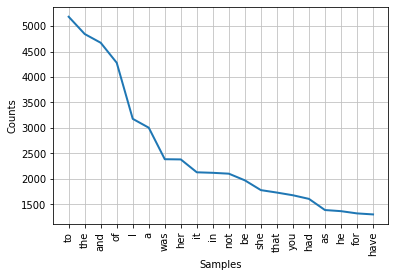

In [ ]:
nltk.Text(words).plot(20)

### Dictionary

In [ ]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1] #끝에서 20개


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


['zymosis',
 'zymosterol',
 'zymosthenic',
 'zymotechnic',
 'zymotechnical',
 'zymotechnics',
 'zymotechny',
 'zymotic',
 'zymotically',
 'zymotize',
 'zymotoxic',
 'zymurgy',
 'Zyrenian',
 'Zyrian',
 'Zyryan',
 'zythem',
 'Zythia',
 'zythum',
 'Zyzomys']

In [ ]:
len(nltk.corpus.words.words('en'))

235886

### Regular expression #적용되는 건 string

In [ ]:
import re

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string #string의 시작
abc$	    Matches some pattern abc at the end of a string #abc로 끝나는 string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure) #0개이상
+	        One or more of previous item, e.g. a+, [a-z]+ #1개이상
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]? #없거나,한개짜리
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S #공백포함
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

'       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures\n\n.\t        Wildcard, matches any character\n^abc\t    Matches some pattern abc at the start of a string\nabc$\t    Matches some pattern abc at the end of a string\n[abc]\t    Matches one of a set of characters\n[^abc]    Matches anything but a set of characters\n[A-Z0-9]\tMatches one of a range of characters\ned|ing|s\tMatches one of the specified strings (disjunction)\n*\t        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)\n+\t        One or more of previous item, e.g. a+, [a-z]+\n?\t        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?\n{n}\t      Exactly n repeats where n is a non-negative integer\n{n,}\t    At least n repeats\n{,n}\t    No more than n repeats\n{m,n}\t    At least m and no more than n repeats\na(b|c)+\t  Parentheses that indicate the scope of the operators\n(...)     Matches whatever regular expression is inside the pare

In [ ]:
re.findall('[^a-z]', 'Considered 3condo') #알파벳 소문자가 아닌 것을 찾아라

['C', ' ', '3']

In [ ]:
re.findall('[a-z]', 'considered condo') #알파벳 소문자를 찾아라

['c', 'o', 'n', 's', 'i', 'd', 'e', 'r', 'e', 'd', 'c', 'o', 'n', 'd', 'o']

In [ ]:
re.findall('ed|ing|s', 'Considered 3condo') #ed, ing, s를 찾아라 #ed\s 접사로 쓰인 ed

['s', 'ed']

In [ ]:
re.findall('[s]*', 'Conssidered 3condo') #s가 0개 이상 들어간 걸 찾아라

['', '', '', 'ss', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [ ]:
re.findall('[s]{2}', 'Conssidered 3condo') #s가 2번 나오는 거 찾아라

['ss']

In [ ]:
engdict = nltk.corpus.words.words('en')

result = [w for w in engdict if re.search('ed$', w)] #string이 ed로 끝나는 거
result = [w for w in engdict if re.search('^..j..t..$', w)] #j,t가 세 번째와 여섯 번째를 차지하는 6글자 단어
result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)] #gold, golf, hold, hole
result = [w for w in engdict if re.search('^[ah]+$', w)][:10] #a, aa, ah, aha, h, ha, hah
print(result[:10])

In [ ]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

# result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)] #숫자가 하나 이상은 나오고/.이 하나 나오고/또 숫자가 하나 이상 나오는 단어 = 소숫점 
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)] #대문자 알파벳이 하나 이상 나오고/$로 끝나는 거
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)] #숫자가 정확하게 4개 나오는 거
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)] #숫자가 하나 이상/-/소문자가 3~5개
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)] #소문자가 5개 이상/-/소문자가 2,3개/-/소문자가 6개 이하

result = sorted(set(result)) #list를 set로 바꾸고 sorted로 해서 다시 result -> abc 순서대로
print(result[:10])

### Extract information (pos tag, named entity)

In [10]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)

In [ ]:
'''
POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent's
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when
'''

In [ ]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)
pos

In [ ]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos) #ne : named entity
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

Named entity ... intention
sk 미래관(named entity)에 가고 싶다(intention)

### Wordcloud

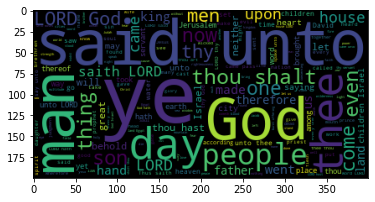

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc)

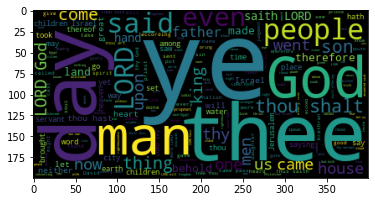

In [ ]:
stopwords = set(STOPWORDS) 
stopwords.add('unto')
wc = WordCloud(stopwords = stopwords).generate(text) 
plt.imshow(wc)